# <center>Project-Based Assignment CLO-2</center>

<b>Topik</b>
Implementation of Supervised Learning on Regression Task

<b>Anggota Kelompok</b>
1. Ari Ziddan Nugraha - 1301213338
2. Anak Agung Gde Pradnyana - 1301213583
3. Gandhi Risyad Abimanyu - 1301213251

#### Latar Belakang
> Dataset telemonitoring Parkinson adalah dataset yang terdiri dari pengukuran suara biomedis dari 42 orang dengan penyakit Parkinson tahap awal yang direkrut untuk uji coba perangkat telemonitoring selama enam bulan untuk pemantauan perkembangan gejala dari jarak jauh. Rekaman secara otomatis diambil di rumah pasien.

> Kolom dalam kumpulan data berisi nomor subjek, usia subjek, jenis kelamin subjek, interval waktu dari tanggal perekrutan awal, UPDRS motorik, total UPDRS, dan 16 ukuran suara biomedis. Setiap baris berhubungan dengan salah satu dari 5.875 rekaman suara dari individu-individu ini. Tujuan utama dari data ini adalah untuk memprediksi skor motorik dan total UPDRS ('motor_UPDRS' dan 'total_UPDRS') dari 16 pengukuran suara.

> Laporan ini bertujuan untuk menganalisis, memvisualisasikan, dan menentukan fitur-fitur penting di antara 20 fitur tersebut yang dapat membantu kita memprediksi dua variabel target, yaitu `motor_UPDRS` dan `total_UPDRS`.
Di bawah ini adalah kamus data untuk dataset ini:



* subject# - Angka unik untuk membedakan setiap subjek
* age - Umur subjek
* sex - Jenis kelamin subjek '0' - pria, '1' - wanita
* test_time - Hari sejak awal percobaan. Angka di sini menunjukan hari percobaan.
* motor_UPDRS - Skor Clinician's motor UPDRS, linearly interpolated
* total_UPDRS - Skor Clinician's total UPDRS, linearly interpolated
* Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP - Beberapa ukuran variasi dalam frekuensi dasar
* Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA - Beberapa ukuran variasi amplitudo
* NHR,HNR - Dua ukuran rasio kebisingan terhadap komponen nada dalam suara
* RPDE - Ukuran kompleksitas dinamik nonlinier
* DFA - Eksponen penskalaan fraktal sinyal
* PPE - Ukuran nonlinier dari variasi frekuensi fundamental



> Tujuan dari analisis ini adalah untuk menemukan kernel optimal pada SVM untuk memprediksi target menggunakan fitur-fitur tersebut. Kami akan menguji beberapa kernel untuk mendapatkan hasil terbaik.

In [ ]:
#import package penting

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing dan EDA

In [ ]:
# Membaca file CSV yang berisi data Parkinson's
data = pd.read_csv('/content/parkinsons_updrs.csv')
# Menampilkan lima baris pertama dari data untuk melihat contoh entri
data.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [ ]:
# Menampilkan informasi umum tentang struktur dataset menggunakan metode info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   sex            5875 non-null   int64  
 3   test_time      5875 non-null   float64
 4   motor_UPDRS    5875 non-null   float64
 5   total_UPDRS    5875 non-null   float64
 6   Jitter(%)      5875 non-null   float64
 7   Jitter(Abs)    5875 non-null   float64
 8   Jitter:RAP     5875 non-null   float64
 9   Jitter:PPQ5    5875 non-null   float64
 10  Jitter:DDP     5875 non-null   float64
 11  Shimmer        5875 non-null   float64
 12  Shimmer(dB)    5875 non-null   float64
 13  Shimmer:APQ3   5875 non-null   float64
 14  Shimmer:APQ5   5875 non-null   float64
 15  Shimmer:APQ11  5875 non-null   float64
 16  Shimmer:DDA    5875 non-null   float64
 17  NHR            5875 non-null   float64
 18  HNR     

In [ ]:
# Menampilkan ringkasan statistik deskriptif dari dataset menggunakan metode describe()
data.describe()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,...,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,21.494128,64.804936,0.317787,92.863722,21.296229,29.018942,0.006154,0.000044,0.002987,0.003277,...,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,12.372279,8.821524,0.465656,53.445602,8.129282,10.700283,0.005624,0.000036,0.003124,0.003732,...,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,1.000000,36.000000,0.000000,-4.262500,5.037700,7.000000,0.000830,0.000002,0.000330,0.000430,...,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,10.000000,58.000000,0.000000,46.847500,15.000000,21.371000,0.003580,0.000022,0.001580,0.001820,...,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,22.000000,65.000000,0.000000,91.523000,20.871000,27.576000,0.004900,0.000035,0.002250,0.002490,...,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,33.000000,72.000000,1.000000,138.445000,27.596500,36.399000,0.006800,0.000053,0.003290,0.003460,...,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,42.000000,85.000000,1.000000,215.490000,39.511000,54.992000,0.099990,0.000446,0.057540,0.069560,...,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


> Dari data info dan describe di atas jumlah data dataset telemonitoring parkinson berjumlah 5875 entries, Namun kami melihat bahwa nilai minimum untuk test_time adalah -4.262500. Namun, nilai ini tidak konsisten dengan definisi data untuk kolom ini yang menyatakan bahwa test_time adalah jumlah hari sejak pasien direkrut ke dalam uji coba. Sehingga nilai negatif pada kolom tersebut tidak masuk akal.

In [ ]:
#Cek value test time apakah ada nilai negativ
print("Total nilai negativ pada var test_time: ", data['test_time'].lt(0).sum())

Total nilai negativ pada var test_time:  12


> Kami melihat bahwa ada 12 record yang memiliki waktu tes yang tidak valid. Lalu kami akan menghapus record-record ini dari dataset karena value tersebut adalah data yang tidak valid karena hari sejak perekrutan hingga uji coba tidak boleh berupa angka negatif.

> Selain itu, kami juga akan menghapus kolom Subject# karena kolom tersebut merupakan kolom indeks dan tidak terlalu berpengaruh bagi modelling kami nantinya.

In [ ]:
# drop test_time yang kurang dari 0 dan subject#
data = data[data['test_time']>0]
data = data.drop('subject#',axis=1)

In [ ]:
# Menampilkan ringkasan statistik deskriptif dari dataset menggunakan metode describe()
data.describe()

,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,...,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000
mean,64.814771,0.318438,93.061538,21.289655,29.014090,0.006156,0.000044,0.002988,0.003278,0.008965,...,0.311012,0.017157,0.020149,0.027489,0.051470,0.032126,21.679527,0.541423,0.653252,0.219618
std,8.827750,0.465910,53.320896,8.133419,10.709966,0.005628,0.000036,0.003126,0.003734,0.009378,...,0.230310,0.013237,0.016672,0.020002,0.039710,0.059735,4.292521,0.101024,0.070955,0.091494
min,36.000000,0.000000,0.395830,5.037700,7.000000,0.000830,0.000002,0.000330,0.000430,0.000980,...,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,58.000000,0.000000,47.335500,15.000000,21.362000,0.003580,0.000022,0.001580,0.001825,0.004730,...,0.175000,0.009280,0.010790,0.015660,0.027830,0.010953,19.404000,0.469695,0.596100,0.156385
50%,65.000000,0.000000,91.754000,20.871000,27.522000,0.004900,0.000035,0.002250,0.002490,0.006750,...,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.917000,0.542250,0.643550,0.205560
75%,72.000000,1.000000,138.460000,27.594000,36.400500,0.006800,0.000053,0.003290,0.003470,0.009880,...,0.365000,0.020605,0.023775,0.032725,0.061805,0.031464,24.445500,0.614045,0.711480,0.264590
max,85.000000,1.000000,215.490000,39.511000,54.992000,0.099990,0.000446,0.057540,0.069560,0.172630,...,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


Bisa dilihat dari data describe bahwa data subject# sudah hilang dan data test_time tidak ada lagi yang bernilai negative

### Check Missing Value

In [ ]:
# Menghitung jumlah nilai null atau missing dalam setiap kolom dataset
data.isnull().sum()

age              0
sex              0
test_time        0
motor_UPDRS      0
total_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
dtype: int64

In [ ]:
# Menghitung jumlah nilai duplicate dalam setiap kolom dataset
data.duplicated().sum()

0

Bisa dilihat di atas dataset tidak mengandung nilai Null dan duplicate

### Corellation Matrix

<Axes: >

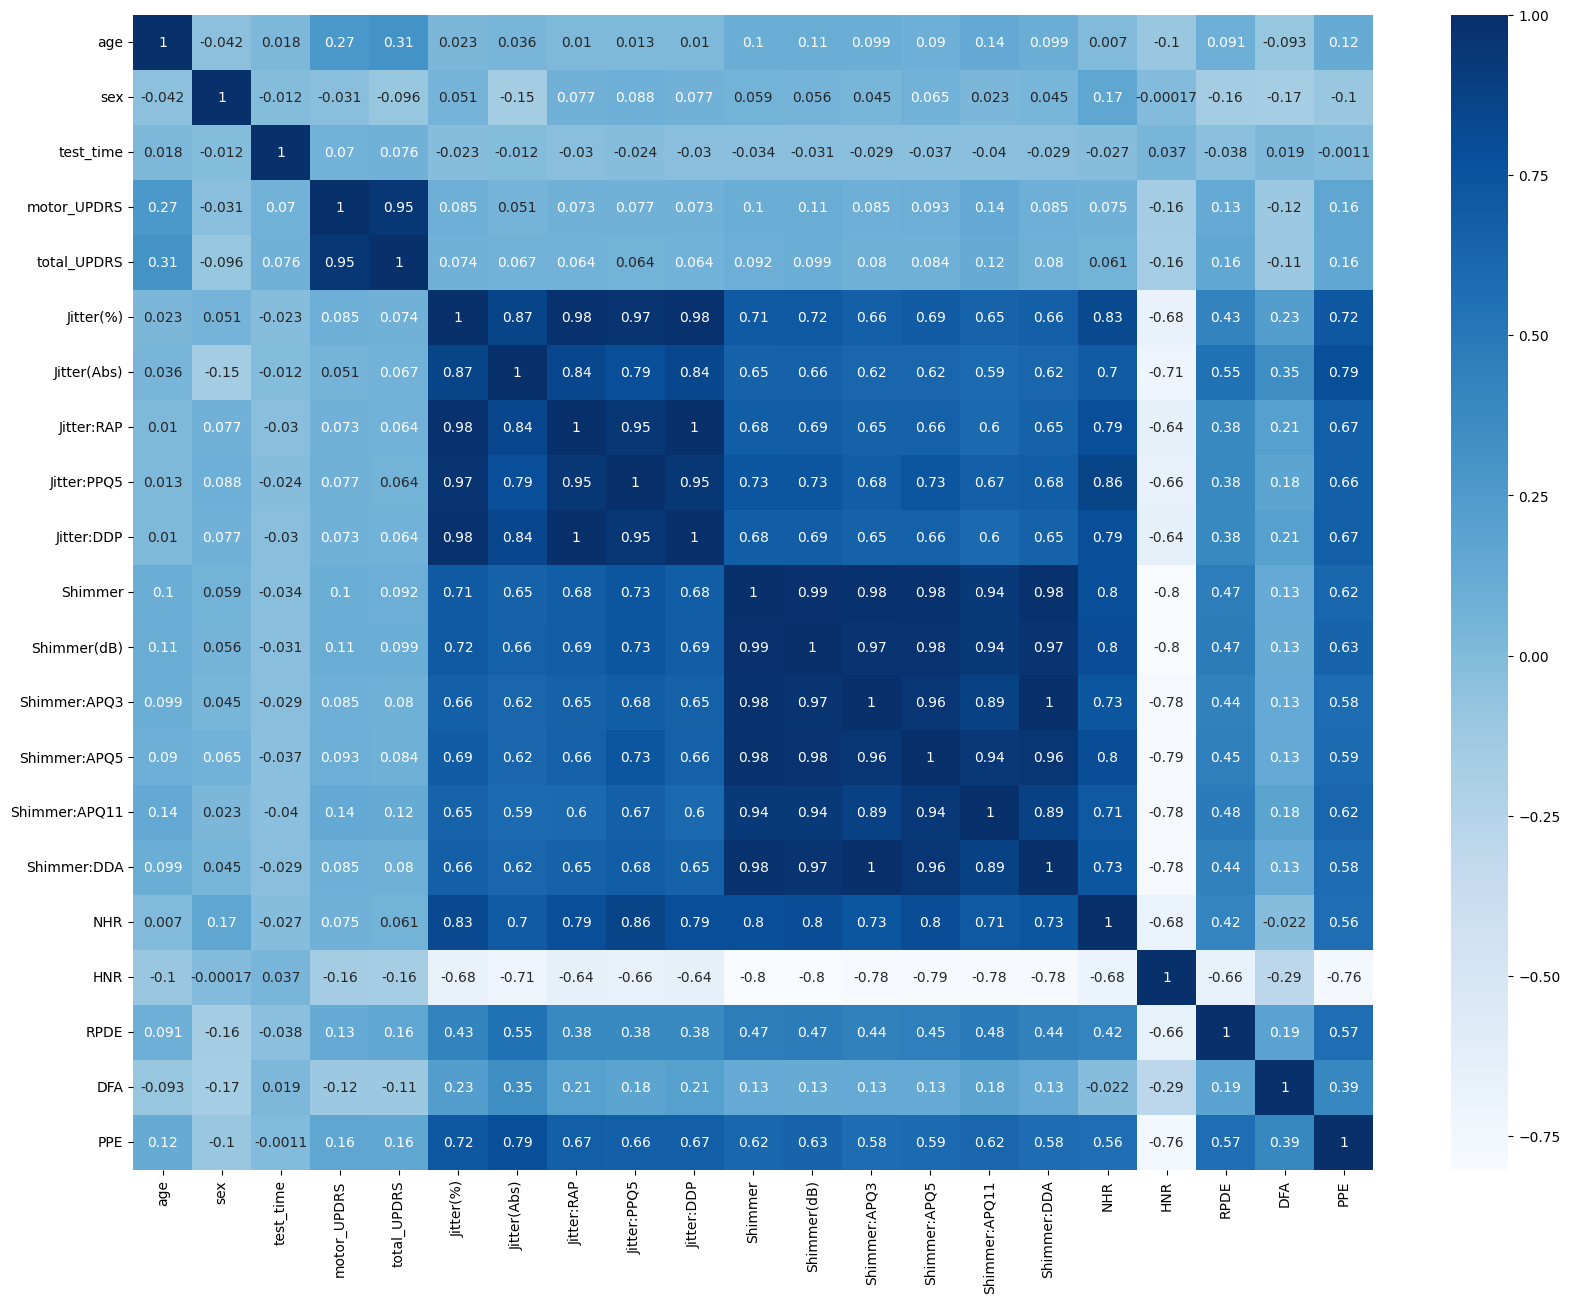

In [ ]:
# menampilkan korelasi antar fitur
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(), annot=True, cmap='Blues')

> **HNR** memiliki korelasi negatif dengan beberapa fitur. Tidak semua **Jitter** memiliki korelasi positif satu sama lain. semua **shimmer** memiliki korelasi positif satu sama lain. Semua **jitter** dan **shimmer** memiliki korelasi satu sama lain. Lalu Korelasi antar target memiliki nilai yang cukup tinggi sebesar **0,95** yang dimana value tersebut akan menjadi kucnci keberhasilan pada modelling nantinya

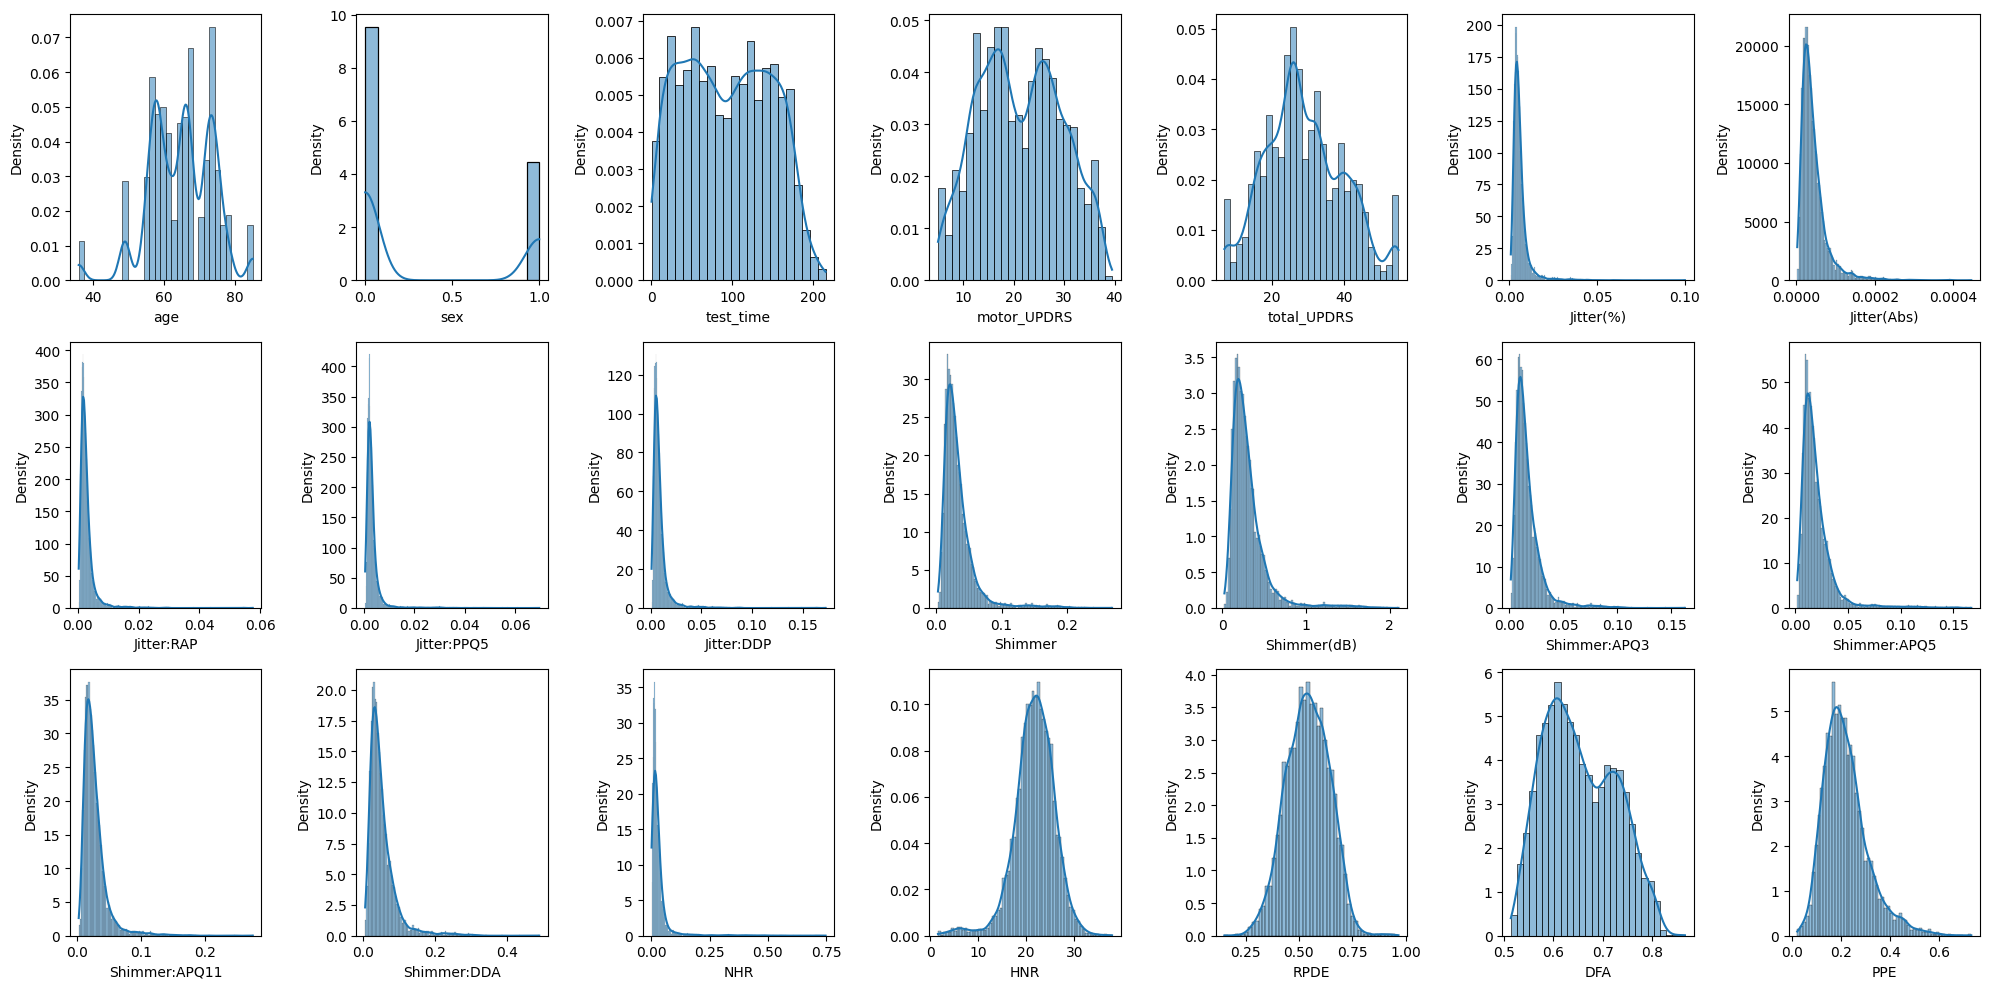

In [ ]:
# menampilkan histogram dari masing-masing fitur
fig = plt.figure(figsize=(20,10))
for i in range(0, len(data.columns)):
  ax = fig.add_subplot(3,7,i+1)
  sns.histplot(data.iloc[:, i], kde=True, stat='density', ax=ax)
plt.tight_layout()

In [ ]:
data.skew() # cek kemiringan fitur untuk melihat persebaran data

age             -0.382077
sex              0.779654
test_time        0.079490
motor_UPDRS      0.076748
total_UPDRS      0.272120
Jitter(%)        6.450972
Jitter(Abs)      3.283195
Jitter:RAP       6.943769
Jitter:PPQ5      7.582627
Jitter:DDP       6.943706
Shimmer          3.314150
Shimmer(dB)      3.099874
Shimmer:APQ3     3.098401
Shimmer:APQ5     3.698075
Shimmer:APQ11    3.404656
Shimmer:DDA      3.098403
NHR              6.547359
HNR             -0.810924
RPDE            -0.037453
DFA              0.281782
PPE              1.088670
dtype: float64

Didapatkan mayoritas persebaran data dari fitur-fitur di dataset memiliki kemiringan ke kanan, hal ini menunjukan data memiliki distribusi yang positif.

### Cek Outlier

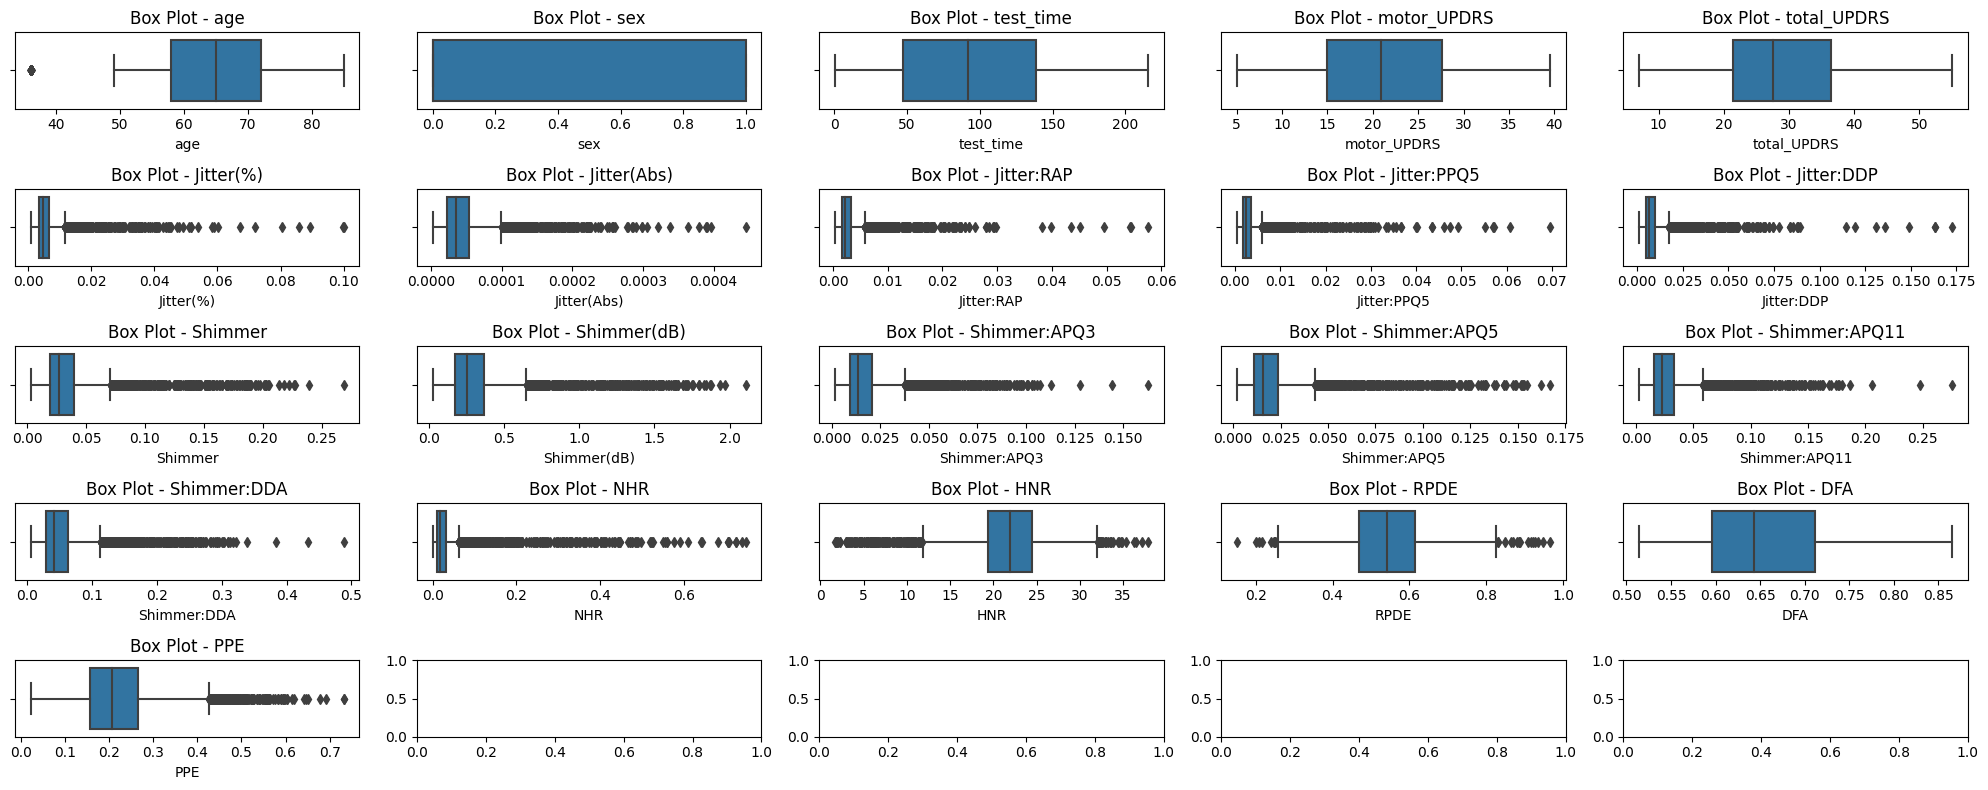

In [ ]:
# Menampilkan box plot dari masing-masing fitur
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 8))

axes = axes.flatten()

# Loop through each column and plot the box plot
for i, column in enumerate(data.columns):
    sns.boxplot(x=data[column], ax=axes[i])
    axes[i].set_title(f'Box Plot - {column}')

plt.tight_layout()

plt.show()

Data yang kami gunakan memiliki banyak outlier, sehingga kita harus menghapus *outlier* tersebut untuk mendapatkan distribusi yang lebih merata.

In [ ]:
def remove_outliers_iqr_all_columns(data):
    # Inisialisasi dataframe baru
    data_no_outliers = pd.DataFrame()

    # Iterasi melalui setiap kolom
    for column in data.columns:
        # Hitung quartal 1 (Q1) dan quartal 3 (Q3) untuk setiap kolom
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)

        # Hitung rentang interquartile (IQR) untuk setiap kolom
        IQR = Q3 - Q1

        # Tentukan batas atas dan batas bawah untuk mendeteksi outlier
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Hapus outlier pada kolom tersebut
        data_no_outliers[column] = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)][column]

    return data_no_outliers

In [ ]:
dataset = data.copy() # Copy dataset untuk menjaga keaslian data

In [ ]:
dataset = remove_outliers_iqr_all_columns(dataset) # menghapus outlier

In [ ]:
# memisahkan data target
selected = ['motor_UPDRS', 'total_UPDRS']
data_y = dataset[selected]
data_y

,motor_UPDRS,total_UPDRS
0,28.199,34.398
1,28.447,34.894
2,28.695,35.389
3,28.905,35.810
4,29.187,36.375
...,...,...
5870,22.485,33.485
5871,21.988,32.988
5872,21.495,32.495
5873,21.007,32.007


In [ ]:
dataset = dataset.drop(selected, axis=1) # menghapus data target dari data fitur

Disini kami memisahkan feature dan target menjadi 2 dataset dan target sudah berhasil di hapus di dataset sebelumnya

In [ ]:
dataset

,age,sex,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,72,0,5.6431,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,72,0,12.6660,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,72,0,19.6810,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,72,0,25.6470,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,72,0,33.6420,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,61,0,142.7900,0.00406,0.000031,0.00167,0.00168,0.00500,0.01896,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,61,0,149.8400,0.00297,0.000025,0.00119,0.00147,0.00358,0.02315,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,61,0,156.8200,0.00349,0.000025,0.00152,0.00187,0.00456,0.02499,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,61,0,163.7300,0.00281,0.000020,0.00128,0.00151,0.00383,0.01484,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204


In [ ]:
print(dataset.isnull().sum()) # menampilkan data null

age                0
sex                0
test_time          0
Jitter(%)        397
Jitter(Abs)      365
Jitter:RAP       413
Jitter:PPQ5      422
Jitter:DDP       410
Shimmer          332
Shimmer(dB)      331
Shimmer:APQ3     330
Shimmer:APQ5     311
Shimmer:APQ11    313
Shimmer:DDA      330
NHR              434
HNR              168
RPDE              26
DFA                0
PPE              205
dtype: int64


> Namun setelah menghapus pencilan muncul masalah baru, yaitu data null, sehingga kami harus mengisi data null tersebut dengan median dan sebagian dengan mean. Alasan pemilihan median ini karena distribusi datanya mayoritas rigth skewness dan ada beberapa value dari variabel memiliki distribusi cenderung ke tengah sehingga menggunakan mean

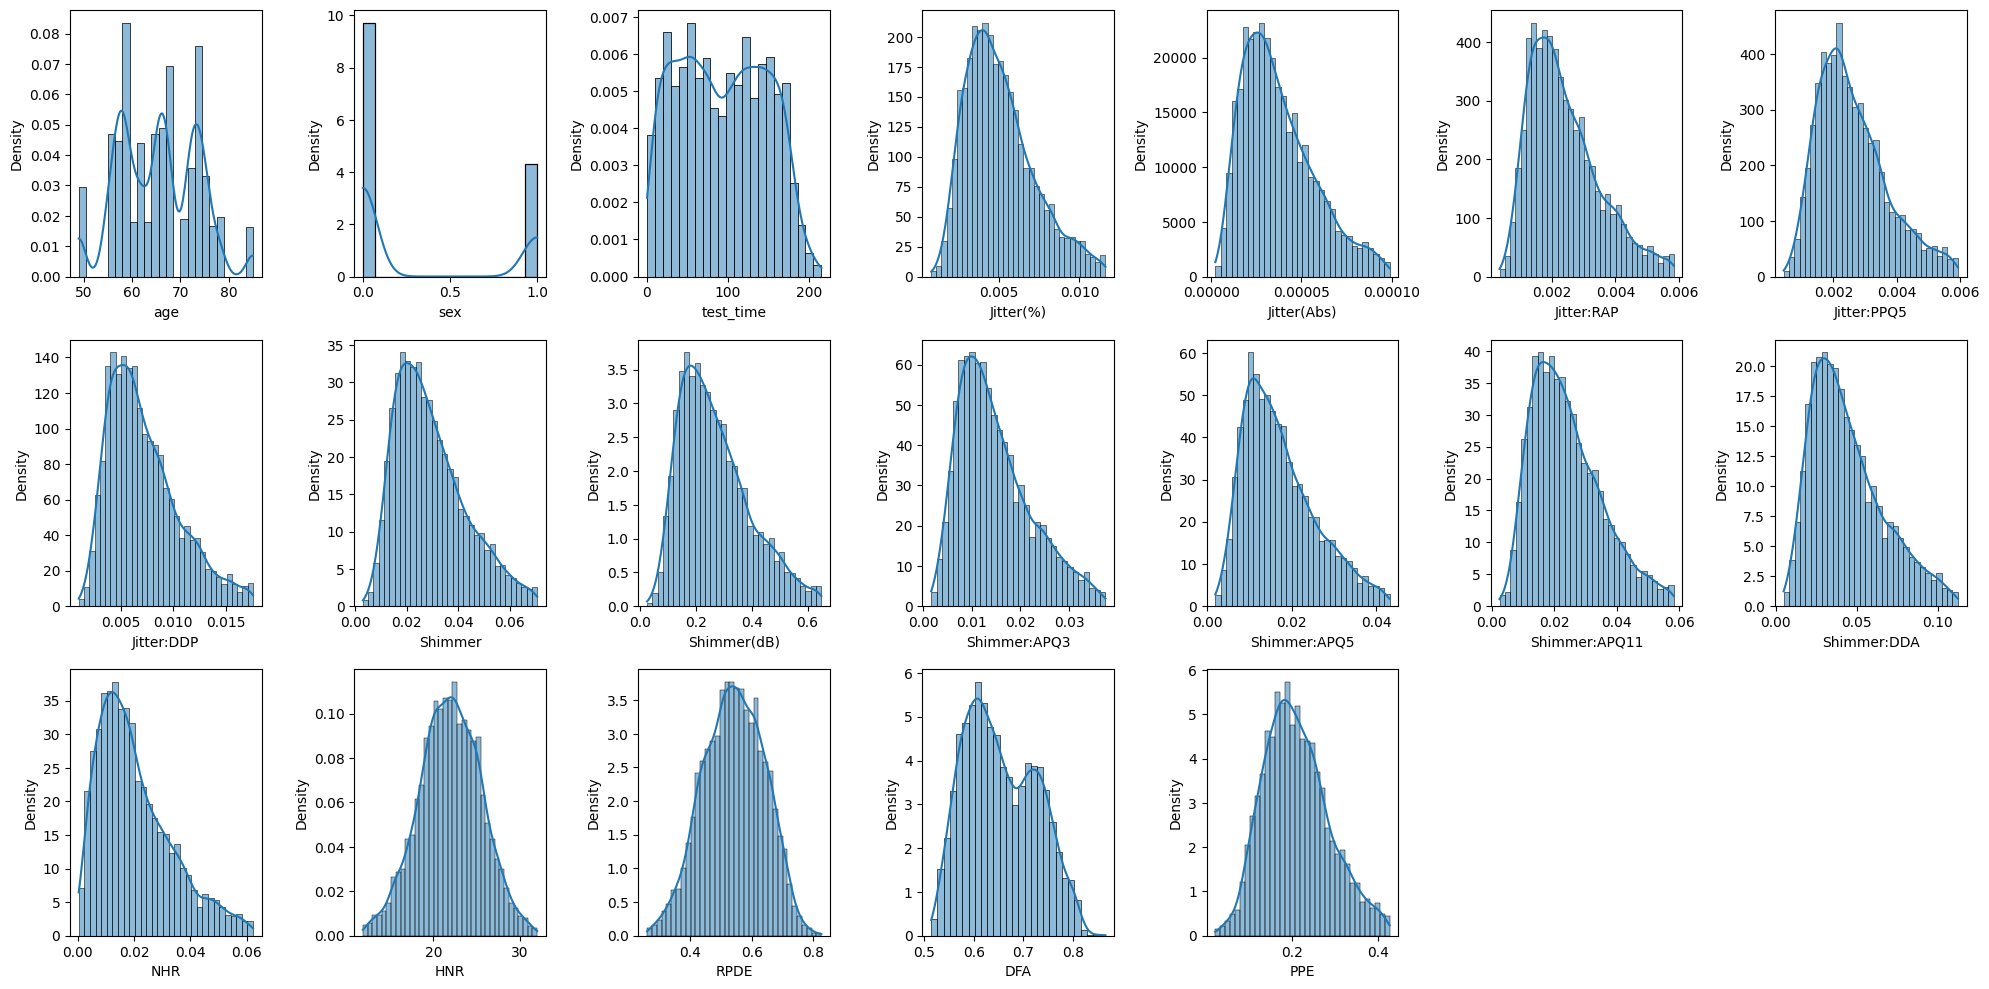

In [ ]:
# menampilkan histogram

fig = plt.figure(figsize=(20,10))
for i in range(0, len(dataset.columns)):
  ax = fig.add_subplot(3,7,i+1)
  sns.histplot(dataset.iloc[:, i], kde=True, stat='density', ax=ax)
plt.tight_layout()

In [ ]:
# pengisian null dengan mean
col = ['PPE', 'HNR', 'RPDE']
dataset[col] = dataset[col].fillna((dataset[col].mean()))

In [ ]:
# pengisian null dengan median
col1 = ['age','Jitter(%)','Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:APQ11', 'Shimmer:DDA', 'NHR']
for i in col1:
  dataset[i] = dataset[i].fillna((dataset[i].median()))

Bisa dilihat pada jumlah Null setiap feature cukup banyak sehingga kami mengisi nilai Null dengan mean dan median tergantung dari distribusi datanya

In [ ]:
print(dataset.isnull().sum()) # menampilkan data null

age              0
sex              0
test_time        0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
dtype: int64


Data Null sudah berhasil dihilangkan

# Model Baseline

**Ringkasan Metode**

> Metode yang kami pilih adalah SVM untuk Regression. SVM adalah suatu metode dalam pembelajaran mesin yang digunakan untuk klasifikasi dan regresi. Ide dasar dibalik SVM adalah mencari pemisah terbaik yang memaksimalkan antara dua kelas dalam ruang fitur. Alasan kami memilih svm karena SVM memiliki ketahanan terhadap outlier dalam data dan SVM memungkinkan penggunaan berbagai fungsi kernel, seperti linear, polinomial, dan radial basis function (RBF) yang memungkinkan adaptasi terhadap berbagai bentuk data dan masalah. Oleh karena itu, SVM bisa menjadi pilihan yang baik

In [ ]:
# import modul penting

from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [ ]:
# Membuat instance dari MinMaxScaler
scaler = MinMaxScaler()

# Melakukan fitting scaler pada data dan mentransformasikan data
scaled_data = scaler.fit_transform(dataset)

print(scaled_data)

[[0.63888889 0.         0.02439522 ... 0.2819059  0.0977927  0.34117769]
 [0.63888889 0.         0.05704557 ... 0.31016692 0.14429969 0.21278851]
 [0.63888889 0.         0.08965919 ... 0.35821947 0.08536238 0.46492154]
 ...
 [0.33333333 0.         0.72723575 ... 0.38586421 0.18443509 0.29549032]
 [0.33333333 0.         0.75936121 ... 0.54562262 0.140033   0.29665165]
 [0.33333333 0.         0.7919051  ... 0.57631357 0.16136648 0.3246225 ]]


> MinMaxScaller membantu mengatasi masalah skala antar fitur. Normalisasi menggunakan MinMaxScaler membantu menghindari dominasi satu fitur atas fitur lainnya.

In [ ]:
def train_model(data, y_data):
  # Memisahkan data menjadi set pelatihan dan pengujian
  x_train, x_test, y_train, y_test = train_test_split(data, y_data, test_size=0.3, random_state=42)

  # Membuat model SVR (Support Vector Regression)
  model = make_pipeline(SVR(C=1.0, epsilon=0.1)) # kernel is not set, but the defaulte is 'rbf'

  # Melatih model dengan data pelatihan
  model.fit(x_train, y_train)

 # Melakukan prediksi pada data pengujian
  y_pred = model.predict(x_test)

  # Menghitung mean squared error (MSE)
  mse = mean_squared_error(y_test, y_pred)
  print("Mean Squared Error:", mse)

  # Hitung RMSE (Root Mean Squared Error)
  rmse = np.sqrt(mse)
  print("RMSE:", rmse)

  print("R2 Score: ", r2_score(y_test, y_pred))

In [ ]:
# training model menggunakan target motor_UPDRS
train_model(scaled_data, data_y['motor_UPDRS'])

Mean Squared Error: 42.87101574841233
RMSE: 6.547596180921081
R2 Score:  0.3279882675286082


In [ ]:
# training model menggunakan target total_UPDRS
train_model(scaled_data, data_y['total_UPDRS'])

Mean Squared Error: 80.80326971270435
RMSE: 8.989063895239834
R2 Score:  0.271987525526348


> Karena korelasi antar target tinggi, yaitu sekitar 0.9. Maka kami memutuskan untuk memilih satu target dengan R2 score yang lebih tinggi, yaitu motor_UDPRS.

# Explorasi Model

> Kami menggunakan kernels lain untuk mengetahui kernel mana yang paling cocok dengan dataset yang kita gunakan. Adapun kernel yang kita gunakan adalah linear, poly, sigmoid. Dengan catatan model baseline yang kita gunakan adalah kernal rbf.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(scaled_data, data_y['motor_UPDRS'], test_size=0.3, random_state=42) # menentukan pembagian antara data training dan data testing

In [ ]:
# Kami menggunakan beberapa kernel yang berbeda
kernels = ['linear', 'poly', 'sigmoid']

In [ ]:
for kernel in kernels:
    # Membuat pipeline dengan standard scaler dan model SVR dengan kernel yang ditentukan
    model = make_pipeline(SVR(kernel=kernel,C=1.0, epsilon=0.1))

    # Train the model on the training data
    model.fit(x_train, y_train)

    # Melakukan prediksi pada set data pengujian
    y_pred = model.predict(x_test)
    print(f'Model with {kernel} kernel:')

    # Menghitung mean squared error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error:", mse)

    # Menghitung RMSE score
    rmse = np.sqrt(mse)
    print("RMSE:", rmse)

    # Menghitung R2 score
    print("R2 Score: ", r2_score(y_test, y_pred))

Model with linear kernel:
Mean Squared Error: 59.91225338493583
RMSE: 7.740300600424756
R2 Score:  0.06086346472985604
Model with poly kernel:
Mean Squared Error: 40.08516049876138
RMSE: 6.331284269305982
R2 Score:  0.37165710485494996
Model with sigmoid kernel:
Mean Squared Error: 1221.1939626257026
RMSE: 34.94558573876968
R2 Score:  -18.14245921588864


> Setelah dibandingkan dengan kernel lain dan model baseline (RBF), kernel **poly** lebih baik dibandingkan kernel yang lain. Namun, kami akan mencoba mentuning parameter menggunakan `GridSearchCV` untuk mencari hasil optimal dari kernel tersebut.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

> Parameter C digunakan untuk mengontrol antara overfitting dan underfitting pada model kami. Parameter gamma digunakan untuk mengontrol dampak satu titik terhadap titik lainnya. Penggunaan Scale dan Auto pada gamma berfungsi untuk mencari pilihan feature yang paling baik. Parameter kernel digunakan untuk membandingkan kernal yang memiliki akurasi paling optimal.

In [ ]:
# Hyperparameter Tuning menggunakan Grid Search
param_grid = {'C': [1, 10, 100], 'gamma': ['scale', 'auto'], 'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}
grid_search = GridSearchCV(SVR(), param_grid, refit=True, verbose=2, scoring='neg_mean_squared_error')

# Melatih model dengan melakukan pencarian grid pada data pelatihan
grid_search.fit(x_train, y_train)

# Mendapatkan parameter terbaik dan estimator terbaik
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)

# Evaluasi Best Model
y_pred_best = best_estimator.predict(x_test)

print("Evaluation of the Best Model:")
print("MSE:", mean_squared_error(y_test, y_pred_best))
print("MAPE:", mean_absolute_percentage_error(y_test, y_pred_best))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_best)))
print("R2:", np.sqrt(r2_score(y_test, y_pred_best)))


Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   1.2s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.8s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.8s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.8s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.8s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   0.5s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   0.5s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   0.5s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   0.5s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   0.5s
[CV] END ......................C=1, gamma=scale, kernel=poly; total time=   1.2s
[CV] END ......................C=1, gamma=scale

# Hasil dan Analisis


1.   **Preprocessing**

> Dalam tahap ini, kami menemukan tidak adanya missing value pada dataset yang kami gunakan. Namun, terdapat banyak outlier yang dapat mengganggu akurasi pada training data.



2.   **EDA**

> Pada tahap EDA, kami mencari korelasi antar data dan memvisualisasikannya menggunakan heatmap. Selain itu, kami menghapus outlier pada dataset kami. Namun, masalah lain muncul, yaitu munculnya nilai null pada data dan outlier baru. Untuk mengatasi hal itu, kami mengisi nilai null dengan mean dan median tergantung skewness feature.



3.   **Modelling**

> Kami menggunakan SVM(SVR) untuk mentraining data kami. Alasannya, yaitu SVM lebih tahan terhadap outlier. Pada tahapan SVM, kami melakukan scaller menggunakan minmax scaller. setelah itu, kami melakukan percobaan menggunakan kernel lain sebagai pembanding model baseline. Dimana model baseline menggunakan kernel RBF dan kernel lainnya yaitu Poly, Linear, dan sigmoid.

4.   **Evaluation**

> Kami menggunakan metrix evaluation MSE, R2, MAPE, RMSE. Tujuan dari penggunaan  metrix ini untuk menunjukan nilai sebenarnya dengan nilai prediksi. Selain itu, untuk mendapatkan evaluasi nilai dari model yang kami kembangkan.

> Pada tahap pertama training model baseline kami mendapatkan:

> **target motor_UDPRS**
* Mean Squared Error: 42.87101574841233
* RMSE: 6.547596180921081
* R2 Score:  0.3279882675286082

> **target total_UDPRS**
* Mean Squared Error: 80.80326971270435
* RMSE: 8.989063895239834
* R2 Score:  0.271987525526348

> pada tahap selanjutnya kami menggunakan target motor_UDPRS karena memiliki akurasi yang lebih tinggi dengan total_UDPRS. alasan lainnya yaitu korelasi antar target tinggi yaitu mencapai 0.9.

> Pada tahap pertama kernel pembanding kami mendapatkan:
**Model with linear kernel:**
* Mean Squared Error: 59.91225338493583
* RMSE: 7.740300600424756
* R2 Score:  0.06086346472985604

> **Model with poly kernel:**
* Mean Squared Error: 40.08516049876138
* RMSE: 6.331284269305982
* R2 Score:  0.37165710485494996

> **Model with sigmoid kernel:**
* Mean Squared Error: 1221.1939626257026
* RMSE: 34.94558573876968
* R2 Score:  -18.14245921588864

> Setelah dilakukan gridsearchCV didapatkan hasil terbaiknya adalah:

> *Best Hyperparameters: {**'C': 100, 'gamma': 'scale', 'kernel': 'rbf'**}*
Evaluation of the Best Model:
* MSE: 26.85674125428088
* MAPE: 0.22115252370119973
* RMSE: 5.182349009308509
* R2: 0.7609304948569456

# Kesimpulan

> Setelah dilakukan preprocessing, EDA, Modelling menggunakan SVM (SVR), dan evaluasi. didapatkan bahwa kernel yang paling akurat terhadap data trainingnya yaitu rbf dengan nilai
* MSE: 26.85674125428088,
* MAPE: 0.22115252370119973,
* RMSE: 5.182349009308509,
* R2: 0.7609304948569456.

> Maka, RBF merupakan kernel yang paling optimal pada training model kami untuk mendapatkan nilai prediksi motor_UDPRS dan total_UDPRS.